In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11337728/11490434 [============================>.] - ETA: 0s('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))


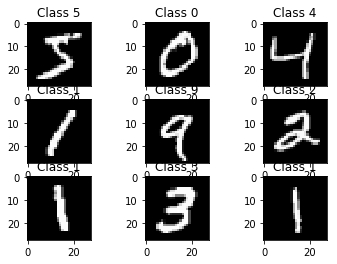

In [4]:
%matplotlib inline

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

('Training matrix shape', (60000, 784))
('Testing matrix shape', (10000, 784))


In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
# SELU based activation. very similar useage as RELU. no dropout.

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('selu')) 
model.add(Dense(512))
model.add(Activation('selu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [12]:
model.fit(X_train, Y_train, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.3178     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.1464     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.1010     
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.0774     
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.0621     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.0553     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.0468     
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.0430     
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.0377     
Epoch 10/10
60000/60000 [==============================] - 2s - loss: 0.0333     


In [15]:
score = model.evaluate(X_test, Y_test)
score

 9472/10000 [===========================>..] - ETA: 0s

0.09173990068372441

In [17]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 8928/10000 [=========================>....] - ETA: 0s

In [18]:
correct_indices

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [19]:
incorrect_indices

array([  18,   96,  115,  149,  151,  247,  259,  321,  326,  340,  381,
        445,  582,  619,  684,  720,  844,  846,  877,  947,  951,  956,
        965, 1014, 1039, 1112, 1181, 1226, 1242, 1247, 1289, 1299, 1319,
       1378, 1393, 1441, 1530, 1549, 1554, 1618, 1678, 1681, 1717, 1748,
       1800, 1941, 1981, 1987, 2004, 2018, 2040, 2070, 2098, 2109, 2118,
       2125, 2130, 2135, 2182, 2224, 2293, 2339, 2369, 2414, 2447, 2462,
       2488, 2534, 2648, 2654, 2743, 2810, 2877, 2921, 2927, 2939, 2953,
       2970, 3073, 3115, 3117, 3172, 3284, 3375, 3388, 3405, 3422, 3475,
       3503, 3520, 3549, 3558, 3565, 3601, 3681, 3718, 3727, 3757, 3762,
       3780, 3806, 3808, 3818, 3838, 3906, 3926, 3941, 3943, 3950, 3984,
       4017, 4065, 4075, 4199, 4201, 4207, 4248, 4269, 4289, 4300, 4306,
       4355, 4360, 4382, 4437, 4443, 4497, 4504, 4534, 4536, 4547, 4551,
       4567, 4731, 4740, 4783, 4807, 4808, 4814, 4830, 4860, 4880, 5067,
       5265, 5676, 5734, 5749, 5887, 5926, 5936, 59

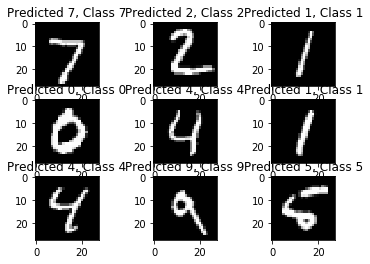

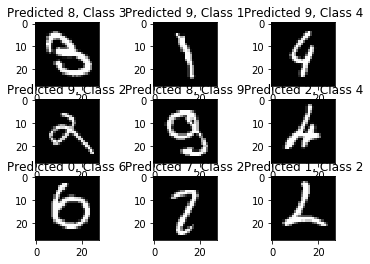

In [20]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))